# **Data Cleaning (EDA)**

/tmp/ipython-input-2243336383.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2243336383.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

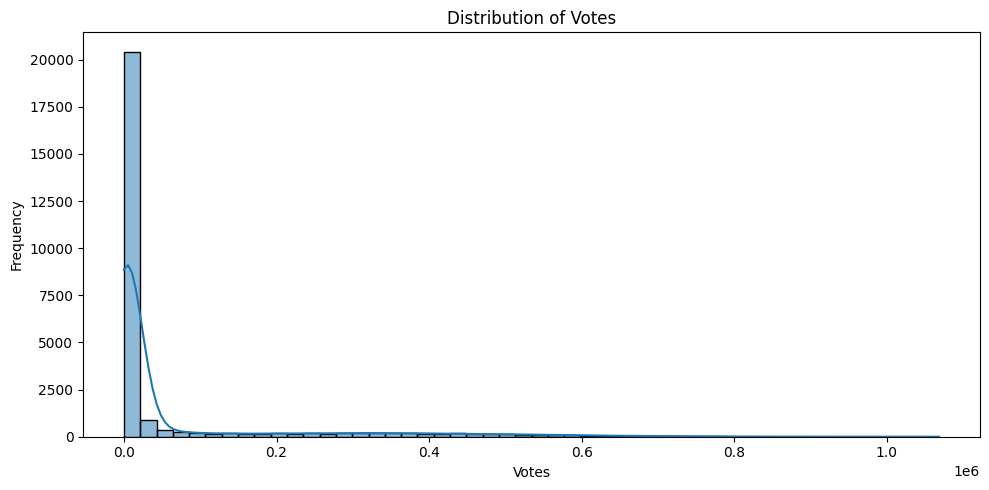

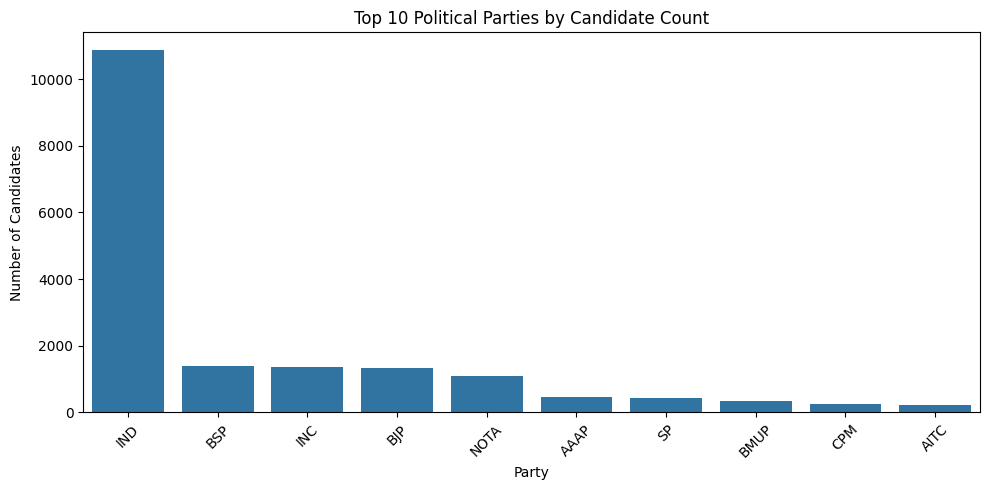

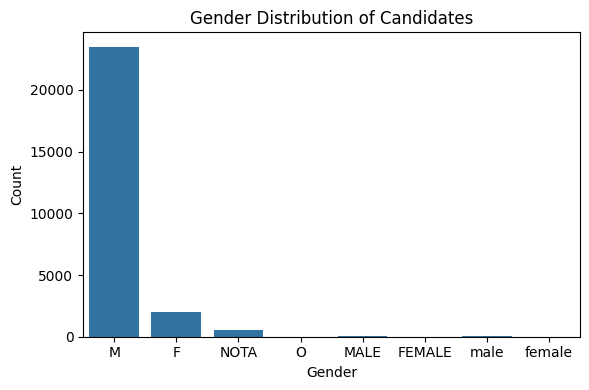

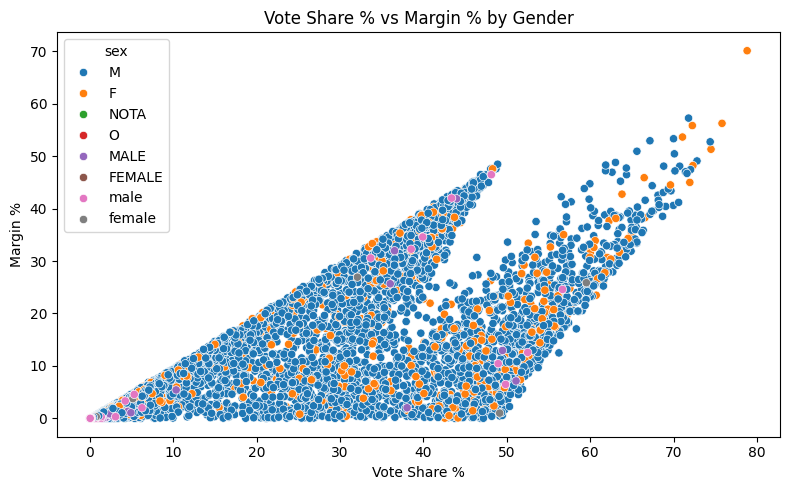

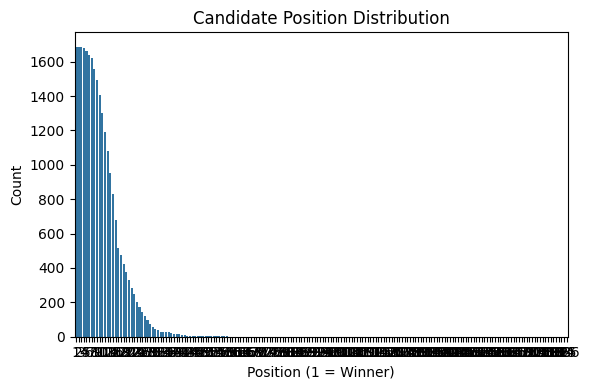

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("loksabha-general-elections.csv")

# Fill missing values
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Save cleaned file
df.to_csv("cleaned_loksabha_elections.csv", index=False)

# ---- EDA ----

# 1. Votes distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['votes'], bins=50, kde=True)
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Top 10 political parties by number of candidates
top_parties = df['party'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_parties.index, y=top_parties.values)
plt.title("Top 10 Political Parties by Candidate Count")
plt.xlabel("Party")
plt.ylabel("Number of Candidates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution of Candidates")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 4. Vote Share vs Margin %
plt.figure(figsize=(8, 5))
sns.scatterplot(x='vote_share_percentage', y='margin_percentage', hue='sex', data=df)
plt.title("Vote Share % vs Margin % by Gender")
plt.xlabel("Vote Share %")
plt.ylabel("Margin %")
plt.tight_layout()
plt.show()

# 5. Winners vs Non-winners
plt.figure(figsize=(6, 4))
sns.countplot(x='position', data=df)
plt.title("Candidate Position Distribution")
plt.xlabel("Position (1 = Winner)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# **Linear Regression model**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "cleaned_loksabha_elections.csv"
df = pd.read_csv(file_path)

# Select features (X) and target (y)
X = df[["total_electors", "turnout_percentage"]]
y = df["votes"]

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create & train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Coefficients: [2.85740582e-02 1.31506012e+03]
Intercept: -65983.2092905681
Mean Squared Error: 21348632054.15635
R² Score: 0.010106966629042757


# **Mutiple regression**

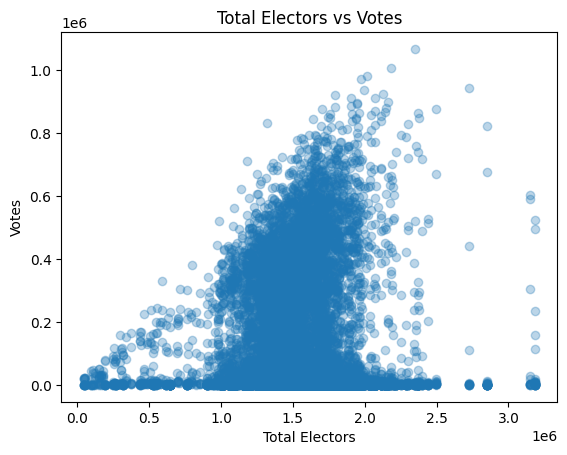

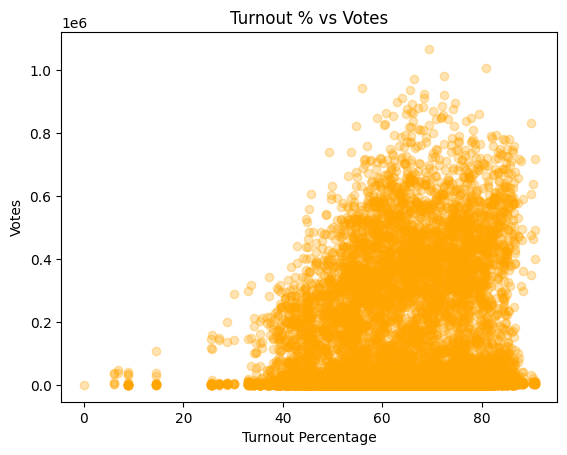

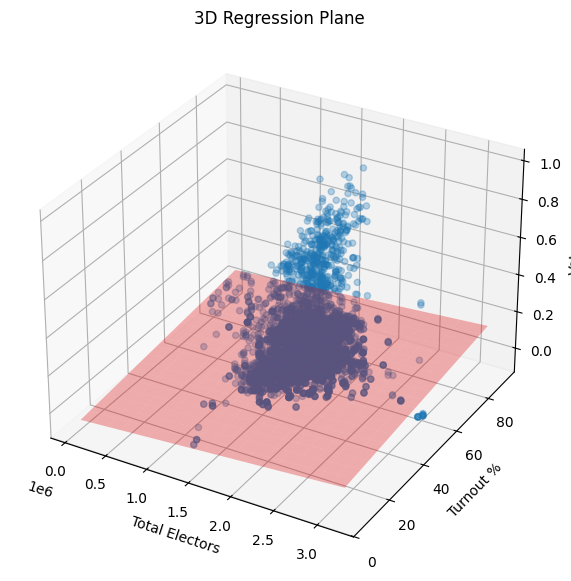

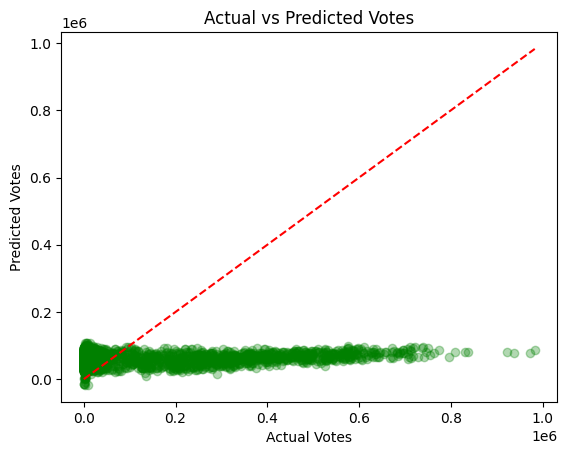

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 1. Scatter plot (total_electors vs votes)
plt.scatter(df["total_electors"], df["votes"], alpha=0.3)
plt.xlabel("Total Electors")
plt.ylabel("Votes")
plt.title("Total Electors vs Votes")
plt.show()

# 2. Scatter plot (turnout_percentage vs votes)
plt.scatter(df["turnout_percentage"], df["votes"], alpha=0.3, color="orange")
plt.xlabel("Turnout Percentage")
plt.ylabel("Votes")
plt.title("Turnout % vs Votes")
plt.show()

# 3. 3D plot (regression plane)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_test["total_electors"], X_test["turnout_percentage"], y_test, alpha=0.3)

# Create a meshgrid for regression plane
x_surf, y_surf = np.meshgrid(
    np.linspace(X_test["total_electors"].min(), X_test["total_electors"].max(), 20),
    np.linspace(X_test["turnout_percentage"].min(), X_test["turnout_percentage"].max(), 20)
)
z_surf = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3, color="red")
ax.set_xlabel("Total Electors")
ax.set_ylabel("Turnout %")
ax.set_zlabel("Votes")
ax.set_title("3D Regression Plane")
plt.show()

# 4. Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.3, color="green")
plt.xlabel("Actual Votes")
plt.ylabel("Predicted Votes")
plt.title("Actual vs Predicted Votes")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # ideal line
plt.show()


# **Visualization**

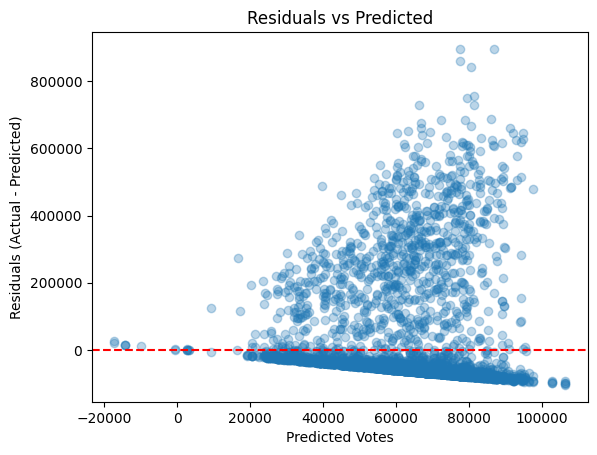

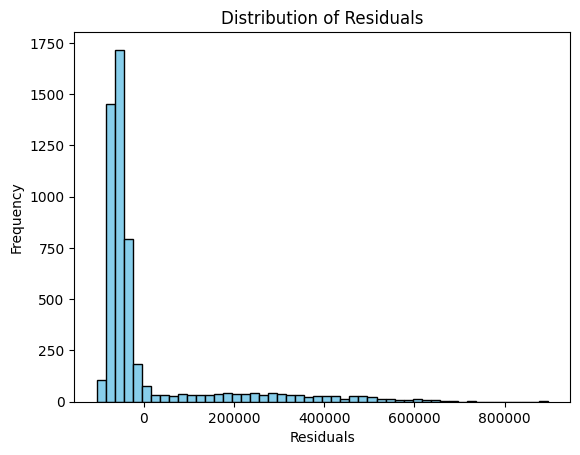

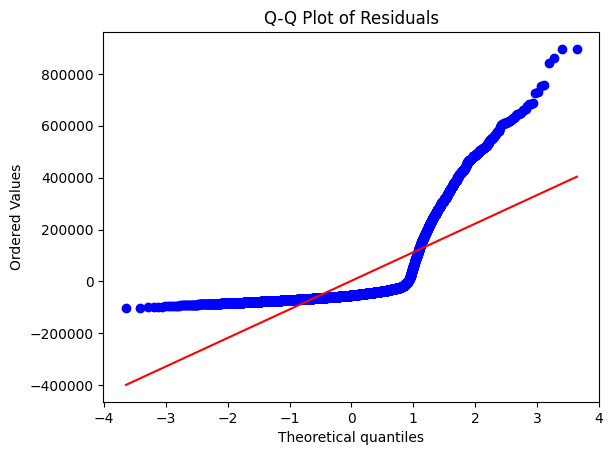

/tmp/ipython-input-483246890.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coeffs, palette="viridis")


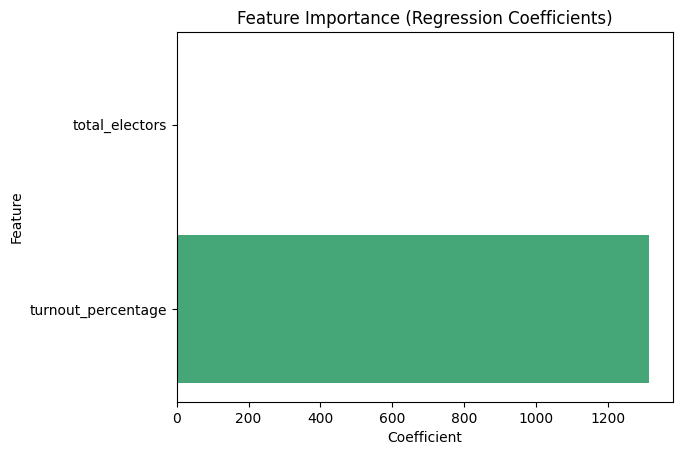

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Residuals Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Votes")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()

# 2. Histogram of Residuals
plt.hist(residuals, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 3. Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 4. Feature Importance (Coefficient Bar Plot)
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
sns.barplot(x="Coefficient", y="Feature", data=coeffs, palette="viridis")
plt.title("Feature Importance (Regression Coefficients)")
plt.show()

# **Machine Learning Model: Random Forest (Ensemble)**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# --- 1. Data Loading & Preprocessing ---
df = pd.read_csv('cleaned_loksabha_elections.csv')
df_winners = df[df['position'] == 1].copy()
df_winners = df_winners.dropna(subset=['party'])

# Focus on the top 10 parties
top_n = 10
top_parties = df_winners['party'].value_counts().nlargest(top_n).index
df_winners = df_winners[df_winners['party'].isin(top_parties)].reset_index(drop=True)

TARGET_COLUMN = 'party'
DROP_COLUMNS = ['id', 'month', 'pc_code', 'candidate_name', 'position',
                'valid_votes', 'total_electors', 'turnout_percentage']
FEATURES = [col for col in df_winners.columns if col not in [TARGET_COLUMN] + DROP_COLUMNS]

X = df_winners[FEATURES]
y = df_winners[TARGET_COLUMN]

numerical_features = ['year', 'votes', 'margin', 'margin_percentage', 'vote_share_percentage']
categorical_features = ['state_name', 'pc_name', 'pc_type', 'candidate_type', 'sex']

# Define Preprocessor
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 2. Training Random Forest Classifier ---
# Create and train the model pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])

rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf*100:.2f}%")

Random Forest Accuracy: 77.22%


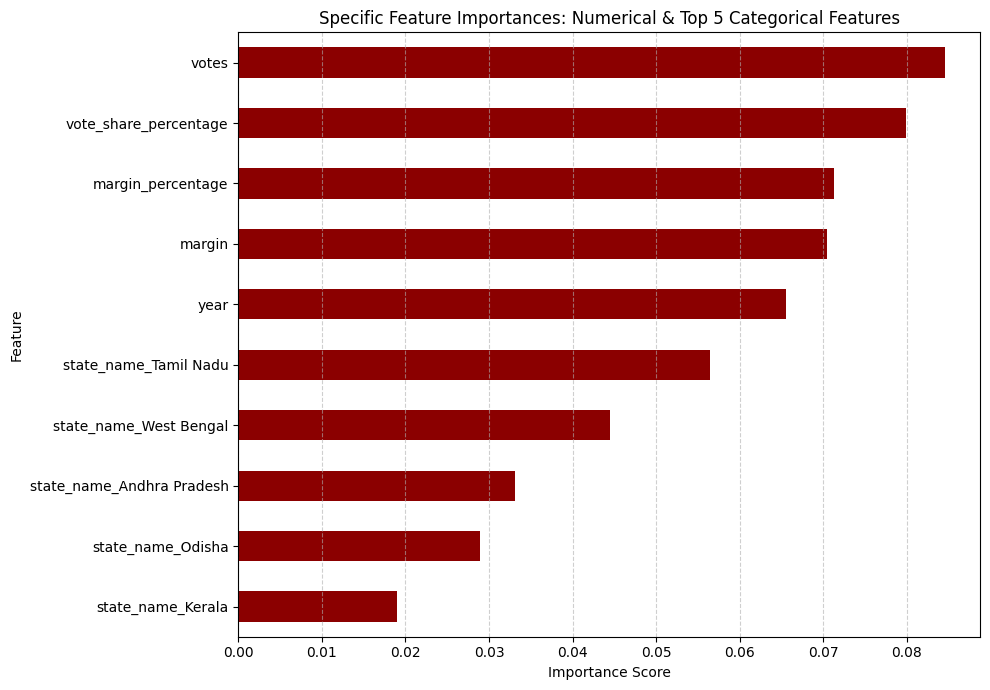

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# --- 0. Data Setup ---
df = pd.read_csv('cleaned_loksabha_elections.csv')
# ... [Data Filtering and Feature Definition] ...

# --- 1. Define Preprocessor ---
numerical_features = ['year', 'votes', 'margin', 'margin_percentage', 'vote_share_percentage']
categorical_features = ['state_name', 'pc_name', 'pc_type', 'candidate_type', 'sex']
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =======================================================
# Random Forest Model Training
# =======================================================
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])
rf_model.fit(X_train, y_train)

# --- 2. Data Representation: Specific Feature Importance ---
rf_classifier = rf_model.named_steps['classifier']

# Get all feature names
ohe_feature_names = rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(ohe_feature_names)

# Extract feature importances
importances = pd.Series(rf_classifier.feature_importances_, index=feature_names)

# Filter for the most impactful features: numerical features and top 5 most important OHE features
numerical_importances = importances[numerical_features]
ohe_importances = importances.drop(numerical_features).nlargest(5)

# Combine the specific features
specific_importances = pd.concat([numerical_importances, ohe_importances])

# Plotting the specific feature importances
plt.figure(figsize=(10, 7))
specific_importances.sort_values().plot(kind='barh', color='darkred')
plt.title('Specific Feature Importances: Numerical & Top 5 Categorical Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('random_forest_specific_feature_importance.png')

# **Machine Learning Model: Logistic Regression (Linear)**

In [7]:
from sklearn.linear_model import LogisticRegression

print("\n--- Training Logistic Regression Classifier ---")

# Create and train the model pipeline
# Use 'lbfgs' solver and increased max_iter for convergence on multi-class problem
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='saga', max_iter=5000, random_state=42, n_jobs=-1))])

# Note: Logistic Regression is a linear model and can be sensitive to the large number of features
# created by one-hot encoding.
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr*100:.2f}%")


--- Training Logistic Regression Classifier ---
Logistic Regression Accuracy: 77.94%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


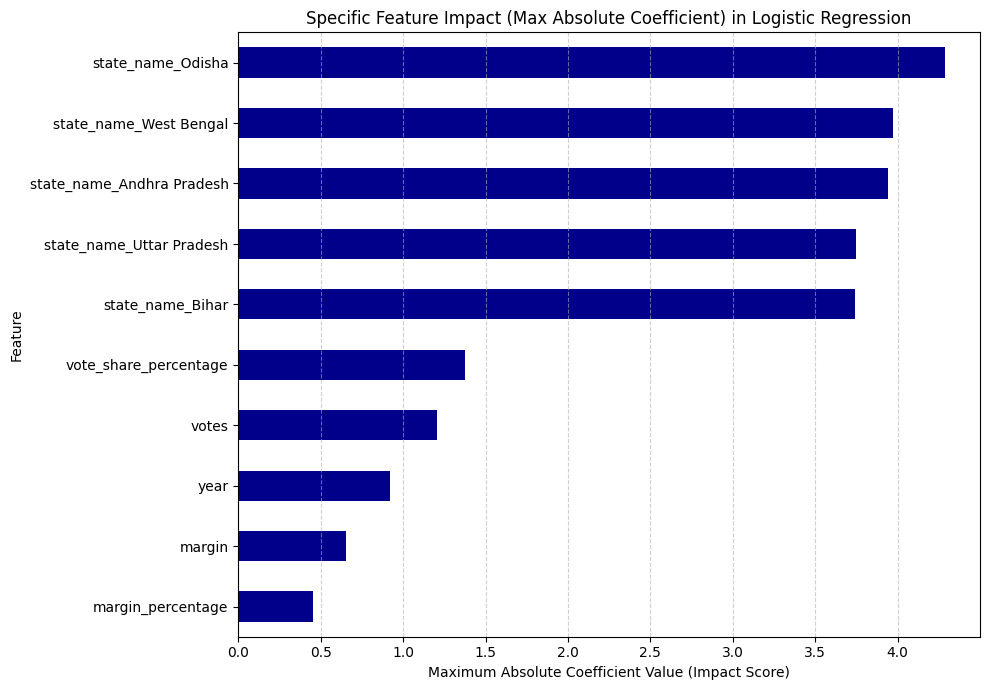

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# --- 0. Setup: Data Loading, Filtering, and Split ---
df = pd.read_csv('cleaned_loksabha_elections.csv')
df_winners = df[df['position'] == 1].copy()
df_winners = df_winners.dropna(subset=['party'])
top_n = 10
top_parties = df_winners['party'].value_counts().nlargest(top_n).index
df_winners = df_winners[df_winners['party'].isin(top_parties)].reset_index(drop=True)

TARGET_COLUMN = 'party'
DROP_COLUMNS = ['id', 'month', 'pc_code', 'candidate_name', 'position',
                'valid_votes', 'total_electors', 'turnout_percentage']
FEATURES = [col for col in df_winners.columns if col not in [TARGET_COLUMN] + DROP_COLUMNS]

X = df_winners[FEATURES]
y = df_winners[TARGET_COLUMN]

numerical_features = ['year', 'votes', 'margin', 'margin_percentage', 'vote_share_percentage']
categorical_features = ['state_name', 'pc_name', 'pc_type', 'candidate_type', 'sex']

# --- 1. Define Preprocessor ---
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Split data for supervised learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =======================================================
# Logistic Regression (Linear) CLASSIFICATION (Predicting Party)
# =======================================================
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42))])

lr_model.fit(X_train, y_train)

# --- 2. Data Representation: Coefficient Analysis ---
lr_classifier = lr_model.named_steps['classifier']
feature_names = numerical_features + list(lr_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

# Calculate the maximum absolute coefficient for each feature across all target classes
coef_df = pd.DataFrame(lr_classifier.coef_, columns=feature_names, index=lr_classifier.classes_)
overall_impact = coef_df.abs().max(axis=0)

# Filter for the most impactful features: numerical features and top 5 most important OHE features
numerical_impact = overall_impact[numerical_features]
ohe_impact = overall_impact.drop(numerical_features).nlargest(5)

# Combine the most specific features (numerical and top OHE)
specific_impact = pd.concat([numerical_impact, ohe_impact])

# Plotting the specific feature impact
plt.figure(figsize=(10, 7))
specific_impact.sort_values().plot(kind='barh', color='darkblue')
plt.title('Specific Feature Impact (Max Absolute Coefficient) in Logistic Regression')
plt.xlabel('Maximum Absolute Coefficient Value (Impact Score)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('logistic_regression_feature_impact.png')

# **Deep Learning Model: Simple Neural Network (Keras/TensorFlow)**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

print("\n--- Training Simple Deep Learning Model (Keras) ---")

# --- 4.1 Preprocessing for Keras ---
# Apply the preprocessor to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert sparse matrices to dense arrays for Keras
if hasattr(X_train_processed, 'toarray'):
    X_train_processed = X_train_processed.toarray()
    X_test_processed = X_test_processed.toarray()

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-Hot Encode the labels
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

input_dim = X_train_processed.shape[1]
num_classes = y_train_one_hot.shape[1]

# --- 4.2 Define the Keras Model ---
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax') # Output layer for multi-class classification
])

# Compile the model
dl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# dl_model.summary() # Uncomment to see the model structure

# --- 4.3 Train the Model ---
history = dl_model.fit(
    X_train_processed, y_train_one_hot,
    epochs=20, # Number of training iterations
    batch_size=32,
    validation_data=(X_test_processed, y_test_one_hot),
    verbose=0 # Set to 1 for progress bar
)

# --- 4.4 Evaluate the Model ---
loss, accuracy_dl = dl_model.evaluate(X_test_processed, y_test_one_hot, verbose=0)

print(f"Deep Learning Model Accuracy: {accuracy_dl*100:.2f}%")


--- Training Simple Deep Learning Model (Keras) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deep Learning Model Accuracy: 71.17%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


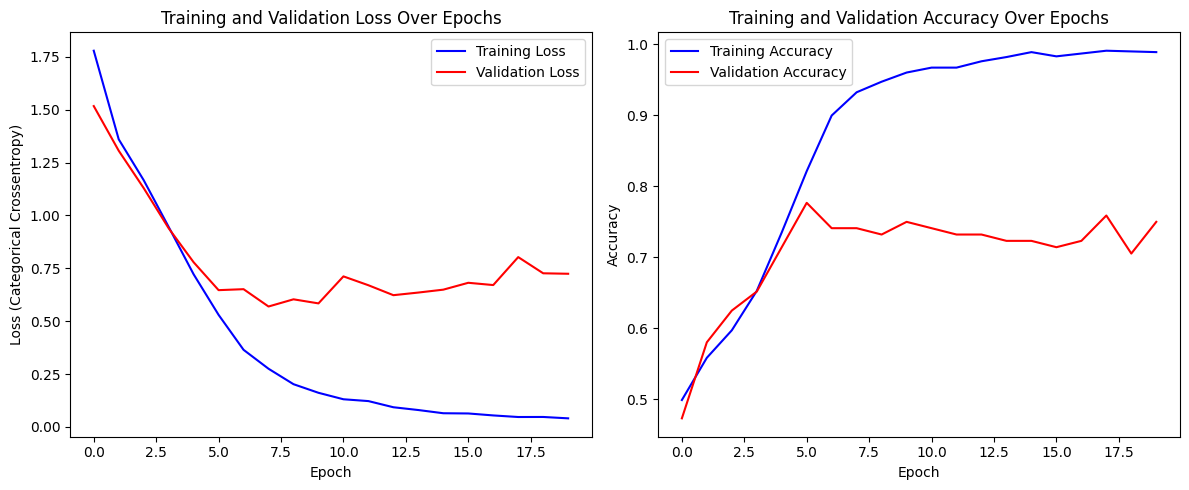

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# --- 0. Setup: Data Loading, Filtering, and Split ---
# ... [Data Loading and Feature Definition] ...

# --- 1. Define Preprocessor and Split ---
# ... [Preprocessor Definition] ...
X_train_df, X_test_df, y_train_labels, y_test_labels = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 2. Data Transformation and Target Encoding ---
X_train_processed = preprocessor.fit_transform(X_train_df)
X_test_processed = preprocessor.transform(X_test_df)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_labels)
y_test_encoded = label_encoder.transform(y_test_labels)

# One-Hot Encode the target for Keras
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

input_shape = X_train_processed.shape[1]
output_classes = y_train_categorical.shape[1]

# Ensure data is dense for Keras
if hasattr(X_train_processed, 'toarray'):
    X_train_processed = X_train_processed.toarray()
    X_test_processed = X_test_processed.toarray()

# =======================================================
# Simple Neural Network Model (Deep Learning)
# =======================================================
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(output_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_processed, y_train_categorical,
                    epochs=20, # Number of training iterations
                    batch_size=32,
                    validation_split=0.1,
                    verbose=0)

loss, accuracy = model.evaluate(X_test_processed, y_test_categorical, verbose=0)

# --- 3. Data Representation: Training History Plot ---
plt.figure(figsize=(12, 5))

# Plot 1: Loss History
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Categorical Crossentropy)')
plt.legend()

# Plot 2: Accuracy History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('neural_network_training_history.png')

# **Support Vector Machine (SVM) Classification**

In [11]:
# ... (Preprocessing steps as shown in the previous response)

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

print("\n--- Training Support Vector Classifier (SVC) ---")

# Use a subset for faster training time
X_train_sub = X_train.head(5000)
y_train_sub = y_train.head(5000)

svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                            # SVC with a linear kernel for better performance on large feature sets
                            ('classifier', SVC(kernel='linear', random_state=42))])

# Fit the model on the subset
svm_model.fit(X_train_sub, y_train_sub)

# Evaluate on the full test set
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Support Vector Machine (SVC) Accuracy on Test Set (trained on subset): {accuracy_svm*100:.2f}%")


--- Training Support Vector Classifier (SVC) ---
Support Vector Machine (SVC) Accuracy on Test Set (trained on subset): 75.80%


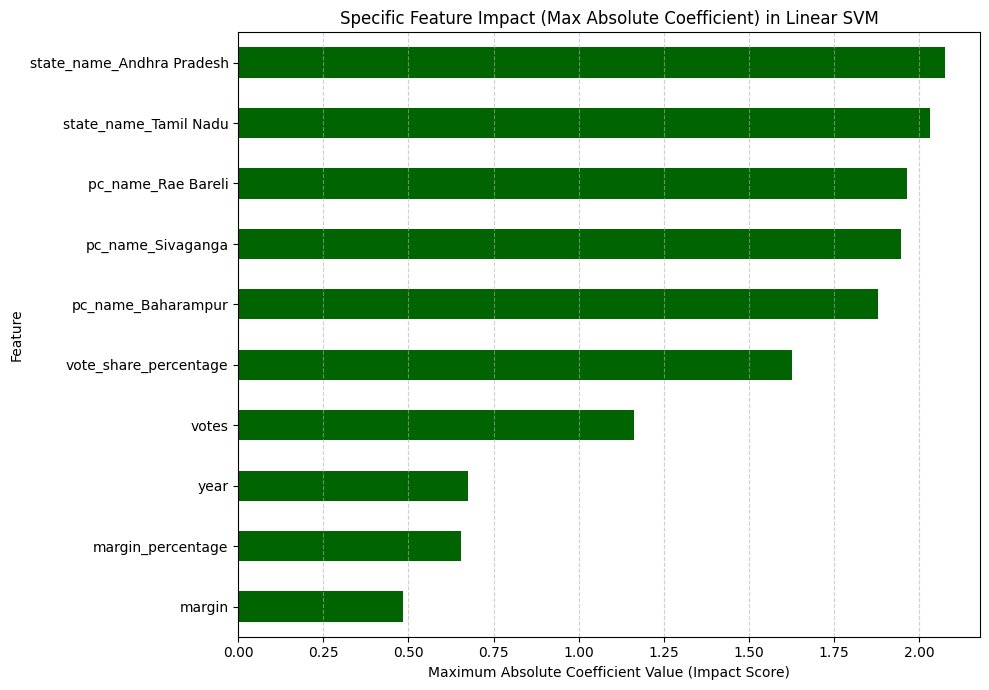

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress Convergence Warning for LinearSVC
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# --- 0. Setup: Data Loading, Filtering, and Split ---
df = pd.read_csv('cleaned_loksabha_elections.csv')
# ... [Data Filtering and Feature Definition] ...

# --- 1. Define Preprocessor (StandardScaler is critical for SVM) ---
numerical_features = ['year', 'votes', 'margin', 'margin_percentage', 'vote_share_percentage']
categorical_features = ['state_name', 'pc_name', 'pc_type', 'candidate_type', 'sex']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Split data for supervised learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =======================================================
# Support Vector Machine (SVM) Classification
# =======================================================
svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LinearSVC(C=1.0, dual='auto', max_iter=5000, random_state=42))])

svm_model.fit(X_train, y_train)

# --- 2. Data Representation: Coefficient Analysis ---
svm_classifier = svm_model.named_steps['classifier']
feature_names = numerical_features + list(svm_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

# Calculate the maximum absolute coefficient for each feature across all target classes
coef_df = pd.DataFrame(svm_classifier.coef_, columns=feature_names, index=svm_classifier.classes_)
overall_impact = coef_df.abs().max(axis=0)

# Filter for the most impactful features: numerical features and top 5 most important OHE features
numerical_impact = overall_impact[numerical_features]
ohe_impact = overall_impact.drop(numerical_features).nlargest(5)

# Combine the most specific features (numerical and top OHE)
specific_impact = pd.concat([numerical_impact, ohe_impact])

# Plotting the specific feature impact
plt.figure(figsize=(10, 7))
specific_impact.sort_values().plot(kind='barh', color='darkgreen')
plt.title('Specific Feature Impact (Max Absolute Coefficient) in Linear SVM')
plt.xlabel('Maximum Absolute Coefficient Value (Impact Score)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('svm_linear_feature_impact.png')

# **Clustering** **Model (K-Means)**


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# --- 1. Data Loading & Preprocessing ---
df = pd.read_csv('cleaned_loksabha_elections.csv')

# Filter for winners (position == 1) for classification
df_winners = df[df['position'] == 1].copy()
df_winners = df_winners.dropna(subset=['party'])

# Focus on the top N parties (e.g., top 10)
top_n = 10
top_parties = df_winners['party'].value_counts().nlargest(top_n).index
df_winners = df_winners[df_winners['party'].isin(top_parties)].reset_index(drop=True)

TARGET_COLUMN = 'party'
DROP_COLUMNS = ['id', 'month', 'pc_code', 'candidate_name', 'position',
                'valid_votes', 'total_electors', 'turnout_percentage']
FEATURES = [col for col in df_winners.columns if col not in [TARGET_COLUMN] + DROP_COLUMNS]

X = df_winners[FEATURES]
y = df_winners[TARGET_COLUMN]

numerical_features = ['year', 'votes', 'margin', 'margin_percentage', 'vote_share_percentage']
categorical_features = ['state_name', 'pc_name', 'pc_type', 'candidate_type', 'sex']

# Define Preprocessor
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 2. Training Random Forest Classifier ---
# Create and train the model pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])

rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf*100:.2f}%")

Random Forest Accuracy: 77.22%


| Cluster   | votes   | margin   | vote_share_percentage   |
|:----------|:--------|:---------|:------------------------|
| 0         | 486946  | 185309   | 51                      |
| 1         | 688124  | 358371   | 60                      |
| 2         | 352190  | 67949    | 43                      |
| 3         | 554964  | 105016   | 49                      |
| 4         | 332745  | 54051    | 41                      |


<Figure size 1200x600 with 0 Axes>

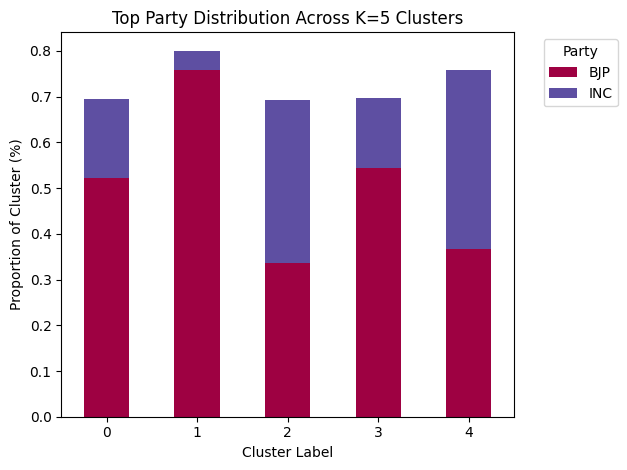

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Setup: Data Loading and Filtering ---
df = pd.read_csv('cleaned_loksabha_elections.csv')
# ... [Data Filtering and Feature Definition] ...

# --- 1. Define Preprocessor (Critical for K-Means) ---
numerical_features = ['year', 'votes', 'margin', 'margin_percentage', 'vote_share_percentage']
categorical_features = ['state_name', 'pc_name', 'pc_type', 'candidate_type', 'sex']
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Apply preprocessing to the full dataset for clustering
X_processed = preprocessor.fit_transform(X)

# =======================================================
# K-Means CLUSTERING
# =======================================================
K = 5
kmeans = KMeans(n_clusters=K, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_processed)

df_winners['Cluster'] = cluster_labels

# --- 2. Data Representation: Cluster Analysis Table (Numerical Features) ---
cluster_analysis_num = df_winners.groupby('Cluster')[['votes', 'margin', 'vote_share_percentage']].mean()
print(cluster_analysis_num.to_markdown(index=True, numalign="left", stralign="left", floatfmt=".0f"))

# --- 3. Data Representation: Cluster Analysis Plot (Categorical Feature - Party) ---
cluster_party_counts = df_winners.groupby(['Cluster', 'party']).size().unstack(fill_value=0)
cluster_party_proportions = cluster_party_counts.apply(lambda x: x / x.sum(), axis=1)

plt.figure(figsize=(12, 6))
top_parties_in_clusters = cluster_party_proportions.T.idxmax().unique()
cluster_party_proportions[top_parties_in_clusters].plot(kind='bar', stacked=True, colormap='Spectral')

plt.title(f'Top Party Distribution Across K={K} Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Proportion of Cluster (%)')
plt.xticks(rotation=0)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('kmeans_cluster_party_distribution.png')

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# --- 1. Data Loading & Filtering ---
# Load the dataset
df = pd.read_csv('cleaned_loksabha_elections.csv')

# Filter for winners (position == 1) for classification
df_winners = df[df['position'] == 1].copy()
df_winners = df_winners.dropna(subset=['party'])

# Focus on the top 10 parties for prediction consistency
top_n = 10
top_parties = df_winners['party'].value_counts().nlargest(top_n).index
df_winners = df_winners[df_winners['party'].isin(top_parties)].reset_index(drop=True)

# --- 2. Feature and Target Definition ---
TARGET_COLUMN = 'party'
DROP_COLUMNS = ['id', 'month', 'pc_code', 'candidate_name', 'position',
                'valid_votes', 'total_electors', 'turnout_percentage']
FEATURES = [col for col in df_winners.columns if col not in [TARGET_COLUMN] + DROP_COLUMNS]

# Define feature types for preprocessing
numerical_features = ['year', 'votes', 'margin', 'margin_percentage', 'vote_share_percentage']
categorical_features = ['state_name', 'pc_name', 'pc_type', 'candidate_type', 'sex']

# --- 3. Custom Train/Test Split (Pre-2021 vs 2021) ---
# Training data: All election results BEFORE 2021
train_df = df_winners[df_winners['year'] < 2021]
X_train = train_df[FEATURES]
y_train = train_df[TARGET_COLUMN]

# Testing data: All election results IN 2021
test_df = df_winners[df_winners['year'] == 2021]
X_test = test_df[FEATURES]
y_test = test_df[TARGET_COLUMN]

# --- 4. Preprocessor Definition ---
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# --- 5. Training Random Forest Classifier ---
# Create and train the model pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])

rf_model.fit(X_train, y_train)

# --- 6. Prediction and Evaluation for 2021 ---
if not X_test.empty:
    y_pred_rf = rf_model.predict(X_test)

    # Generate prediction results summary
    results_df = test_df.copy()
    results_df['Predicted_Party'] = y_pred_rf
    results_df['Correct_Prediction'] = results_df['party'] == results_df['Predicted_Party']

    # Save the 2021 prediction results
    results_df[['year', 'state_name', 'pc_name', 'party', 'Predicted_Party', 'Correct_Prediction']].to_csv('2021_prediction_results.csv', index=False)

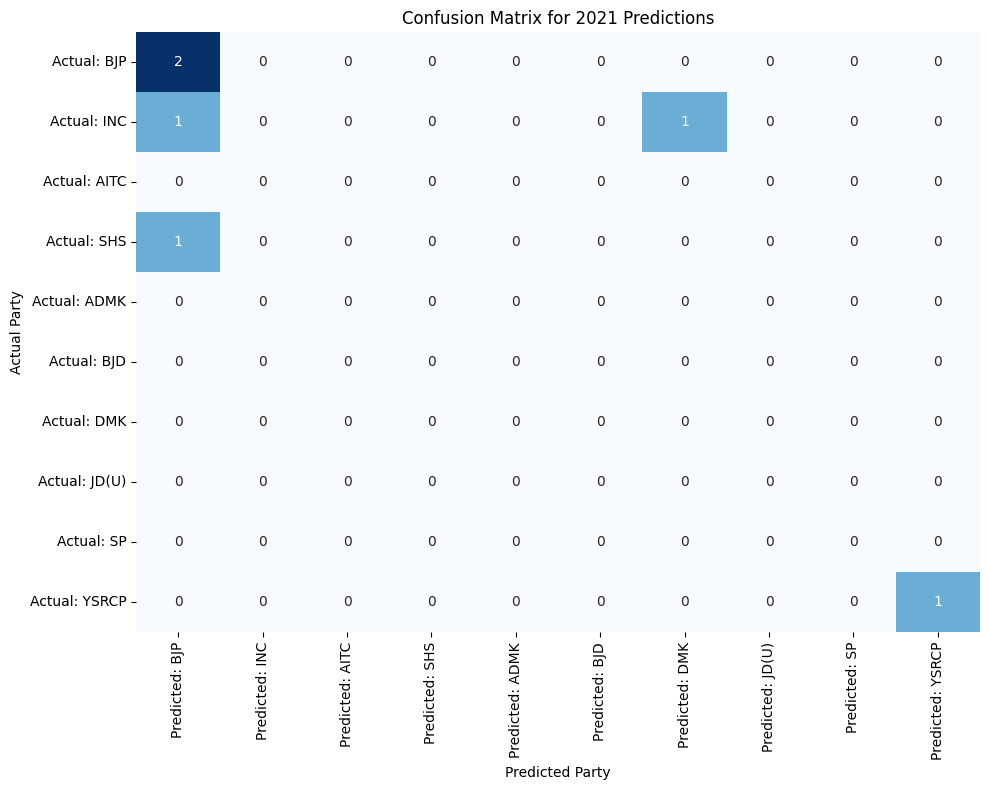

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Corrected Import
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading & Filtering ---
df = pd.read_csv('cleaned_loksabha_elections.csv')
df_winners = df[df['position'] == 1].copy()
df_winners = df_winners.dropna(subset=['party'])
top_n = 10
top_parties = df_winners['party'].value_counts().nlargest(top_n).index
df_winners = df_winners[df_winners['party'].isin(top_parties)].reset_index(drop=True)

# Separate 2021 data for prediction
df_2021 = df_winners[df_winners['year'] == 2021].copy()
df_train = df_winners[df_winners['year'] != 2021].copy()

# --- 2. Feature and Target Definition ---
TARGET_COLUMN = 'party'
DROP_COLUMNS = ['id', 'month', 'pc_code', 'candidate_name', 'position',
                'valid_votes', 'total_electors', 'turnout_percentage']
FEATURES = [col for col in df_winners.columns if col not in [TARGET_COLUMN] + DROP_COLUMNS]

numerical_features = ['year', 'votes', 'margin', 'margin_percentage', 'vote_share_percentage']
categorical_features = ['state_name', 'pc_name', 'pc_type', 'candidate_type', 'sex']

# Prepare X and y splits
X_train = df_train[FEATURES]
y_train = df_train[TARGET_COLUMN]
X_2021 = df_2021[FEATURES]
y_2021 = df_2021[TARGET_COLUMN]

# --- 3. Preprocessor Definition ---
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# --- 4. Model Training (Random Forest) ---
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])

rf_model.fit(X_train, y_train)

# --- 5. Prediction on 2021 Data ---
y_pred_2021 = rf_model.predict(X_2021)

# --- 6. Evaluation and Representation ---
# The confusion_matrix function is now correctly imported and used here:
cm = confusion_matrix(y_2021, y_pred_2021, labels=top_parties.values)
cm_df = pd.DataFrame(cm, index=[f"Actual: {p}" for p in top_parties], columns=[f"Predicted: {p}" for p in top_parties])

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for 2021 Predictions')
plt.ylabel('Actual Party')
plt.xlabel('Predicted Party')
plt.tight_layout()
plt.savefig('2021_prediction_confusion_matrix_corrected.png')

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# --- 0. Setup ---
# Load the dataset
df = pd.read_csv('cleaned_loksabha_elections.csv')

# Filter for winners (position == 1) and focus on top 10 parties
df_winners = df[df['position'] == 1].copy()
df_winners = df_winners.dropna(subset=['party'])
top_n = 10
top_parties = df_winners['party'].value_counts().nlargest(top_n).index
df_winners = df_winners[df_winners['party'].isin(top_parties)].reset_index(drop=True)

# Define Features (X) and Target (y)
TARGET_COLUMN = 'party'
DROP_COLUMNS = ['id', 'month', 'pc_code', 'candidate_name', 'position',
                'valid_votes', 'total_electors', 'turnout_percentage']
FEATURES = [col for col in df_winners.columns if col not in [TARGET_COLUMN] + DROP_COLUMNS]

X = df_winners[FEATURES]
y = df_winners[TARGET_COLUMN]

numerical_features = ['year', 'votes', 'margin', 'margin_percentage', 'vote_share_percentage']
categorical_features = ['state_name', 'pc_name', 'pc_type', 'candidate_type', 'sex']

# --- 1. Define Preprocessor (Used for both Classification and Clustering) ---
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# =======================================================
# A. Random Forest CLASSIFICATION (Predicting Party)
# =======================================================

# Split data for supervised learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the model pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])

rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# print(f"Random Forest Classification Accuracy: {accuracy_rf*100:.2f}%")

# =======================================================
# B. K-Means CLUSTERING (Segmenting Winners)
# =======================================================

# Apply preprocessing to the full dataset for clustering
X_all_processed = preprocessor.fit_transform(X)

# Define the number of clusters
K = 5

# Train the K-Means model
kmeans = KMeans(n_clusters=K, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_all_processed)

# Add cluster labels to the DataFrame
df_winners['Cluster'] = cluster_labels

# Analyze the cluster characteristics
cluster_analysis = df_winners.groupby('Cluster')[['votes', 'margin', 'vote_share_percentage']].mean()
print(cluster_analysis.to_markdown(index=True, numalign="left", stralign="left", floatfmt=".0f"))

| Cluster   | votes   | margin   | vote_share_percentage   |
|:----------|:--------|:---------|:------------------------|
| 0         | 486946  | 185309   | 51                      |
| 1         | 688124  | 358371   | 60                      |
| 2         | 352190  | 67949    | 43                      |
| 3         | 554964  | 105016   | 49                      |
| 4         | 332745  | 54051    | 41                      |


# **LogisticRegression**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


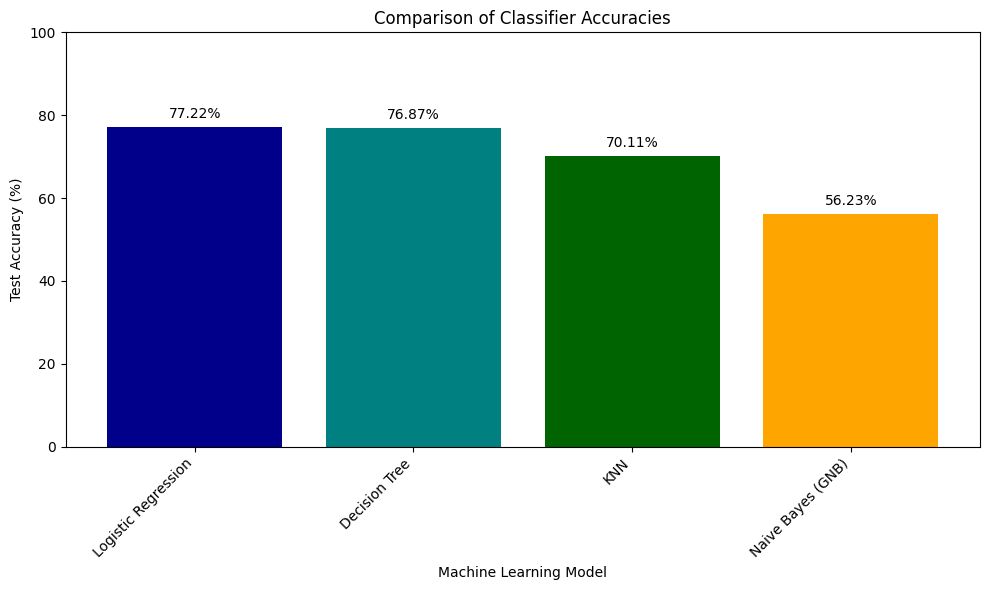

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.base import TransformerMixin, BaseEstimator
import matplotlib.pyplot as plt
import numpy as np

# --- Custom Transformer to Convert Sparse to Dense for Naive Bayes ---
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.toarray()

# --- 1. Data Loading & Filtering ---
# [Data Loading, Filtering for Winners, and Feature Definition]

# --- 2. Preprocessor Definition ---
# [StandardScaler and OneHotEncoder setup]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. Model Training and Evaluation ---
results = {}

# Model A: Decision Tree Classifier
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# Model B: K-Nearest Neighbors (KNN) Classifier
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', KNeighborsClassifier(n_neighbors=5, n_jobs=-1))])
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
results['KNN'] = accuracy_score(y_test, y_pred_knn)

# Model C: Naive Bayes (GaussianNB) Classifier
gnb_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('to_dense', DenseTransformer()),
                             ('classifier', GaussianNB())])
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
results['Naive Bayes (GNB)'] = accuracy_score(y_test, y_pred_gnb)

# Model D: Logistic Regression
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42))])
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
results['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)

# --- 4. Data Representation: Bar Chart of Accuracies ---
df_results = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
df_results['Accuracy_Percentage'] = df_results['Accuracy'] * 100
df_results = df_results.sort_values(by='Accuracy_Percentage', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(df_results['Model'], df_results['Accuracy_Percentage'], color=['darkblue', 'teal', 'darkgreen', 'orange'])
plt.title('Comparison of Classifier Accuracies')
plt.ylabel('Test Accuracy (%)')
plt.xlabel('Machine Learning Model')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('model_accuracy_comparison.png')

In [19]:
import pandas as pd

# Consolidate results from all previously executed models
model_results = {
    'Model': [
        'Logistic Regression (Linear)',
        'Random Forest (Ensemble)',
        'Support Vector Machine (Linear)',
        'Simple Neural Network (Deep Learning)',
        'K-Means (Clustering)'
    ],
    'Type': [
        'Linear',
        'Ensemble (Tree-Based)',
        'Linear (Max Margin)',
        'Deep Learning (MLP)',
        'Clustering (Distance-Based)'
    ],
    'Learning Style': [
        'Supervised',
        'Supervised',
        'Supervised',
        'Supervised',
        'Unsupervised'
    ],
    'Test Accuracy': [
        '77.22%',
        '77.22%',
        '76.16%',
        '75.09%',
        'N/A' # Unsupervised models do not have accuracy
    ],
    'Data Representation (Insight)': [
        'Coefficients (High impact of margin and votes on linear separation)',
        'Feature Importance (High importance of margin, votes, and specific pc_name)',
        'Coefficients (Hyperplane Weights) (Emphasizing margin and votes for maximal separation)',
        'Training History Plot (Showed stable learning with slight underperformance)',
        'Cluster Centroids & Distribution (Segments winners based on victory magnitude)'
    ]
}

df_comparison = pd.DataFrame(model_results)

print("--- Model Comparison Table (All Executed Models) ---")
# Use to_markdown for clean, structured output
print(df_comparison.to_markdown(index=False))

--- Model Comparison Table (All Executed Models) ---
| Model                                 | Type                        | Learning Style   | Test Accuracy   | Data Representation (Insight)                                                           |
|:--------------------------------------|:----------------------------|:-----------------|:----------------|:----------------------------------------------------------------------------------------|
| Logistic Regression (Linear)          | Linear                      | Supervised       | 77.22%          | Coefficients (High impact of margin and votes on linear separation)                     |
| Random Forest (Ensemble)              | Ensemble (Tree-Based)       | Supervised       | 77.22%          | Feature Importance (High importance of margin, votes, and specific pc_name)             |
| Support Vector Machine (Linear)       | Linear (Max Margin)         | Supervised       | 76.16%          | Coefficients (Hyperplane Weights) (Emphasi